<a href="https://colab.research.google.com/github/ShedovaNastya/Introduction-in-ML/blob/main/3.2asvspoof2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASVSpoof2019 что из себя представляет соревнование


ASVSpoof 2019 — это соревнование по аутентификации голоса, которое проводится в рамках конференции Odyssey: The Speaker Recognition Challenge. Цель соревнования — разработать системы, способные различать реальные и поддельные (синтезированные, воспроизведенные или имитированные) голосовые данные. Это важно для обеспечения безопасности систем аутентификации по голосу, которые используются в различных приложениях, таких как мобильные устройства, банковские системы и другие.

ASVSpoof 2019 предоставляет датасет, содержащий реальные и поддельные голосовые записи. Необходимо разработать алгоритмы, которые могут эффективно различать эти записи. Соревнование включает в себя несколько треков, каждый из которых фокусируется на определенном типе атак (например, синтезированные, воспроизведенные или имитированные голоса, логического доступа (LA) и физического доступа (PA)).

**Синтезированные голоса**: Это голоса, созданные с использованием синтезаторов речи, таких как Text-to-Speech (TTS) системы. Они могут быть очень реалистичными и сложными для различения.(Обычно применяются методы машинного обучения для выявления особенностей синтезированных голосов, таких как неестественные паузы, артикуляция и интонация.)

**Воспроизведенные голоса**: Это голоса, которые воспроизводятся с записей или заранее заготовленных аудиофайлов. Они могут быть использованы для имитации реального голоса пользователя.(Использование методов анализа спектральных характеристик для выявления повторяющихся паттернов, которые характерны для воспроизведенных аудиозаписей. Применение методов машинного обучения для выявления особенностей воспроизведенных голосов, таких как отсутствие вариативности в интонации и эмоциональной окраске.)

**Имитированные голоса**: Это голоса, которые имитируют реальный голос пользователя, но создаются другим человеком(Применение методов машинного обучения для выявления особенностей имитированных голосов, таких как несоответствие в фонетике и произношении.)



# Какие фичи можно извлечь из аудио

Из аудиосигнала можно извлечь множество различных признаков, которые могут быть использованы для анализа, классификации и других задач обработки аудио.

1. **MFCC (Mel-frequency Cepstral Coefficients)**: Один из наиболее популярных признаков для анализа речи и музыки. MFCC моделируют характеристики человеческого слуха и часто используются в задачах распознавания речи и идентификации говорящего.

2. **Спектральный центроид**: Указывает, где находится "центр масс" спектра аудиосигнала. Этот признак может быть использован для определения "яркости" звука.

3. **Частота пересечения нуля (Zero Crossing Rate, ZCR)**: Количество раз, когда сигнал меняет знак в течение короткого временного интервала. Этот признак часто используется для анализа речи и музыки.

4. **Спектральная плотность**: Распределение мощности сигнала по частотам. Этот признак может быть использован для анализа спектральных характеристик сигнала.

5. **Спектральный спад**: Указывает наклон спектра аудиосигнала. Этот признак может быть использован для анализа формы спектра.

6. **Спектральный поток**: Изменение спектра между последовательными временными кадрами. Этот признак может быть использован для анализа динамики спектра.

7. **Энергия сигнала**: Общая мощность сигнала. Этот признак может быть использован для анализа громкости сигнала.

8. **RMS (Root Mean Square)**: Среднеквадратичное значение сигнала, которое также является мерой его энергии.

9. **Спектральная ширина (Spectral Bandwidth)**: Ширина спектра сигнала, которая может быть использована для анализа его частотного содержания.

10. **Спектральный спад (Spectral Rolloff)**: Частота, ниже которой сосредоточена определенная часть общей энергии спектра.

11. **Межфреймовая разность (Delta Features)**: Изменение признаков между последовательными временными кадрами, которое может быть использовано для анализа динамики сигнала.

12. **Линейчатые спектры (Harmonic Features)**: Анализ гармоник сигнала, который может быть использован для анализа музыкальных инструментов и голоса.

13. **Временные контуры (Temporal Envelopes)**: Анализ изменения амплитуды сигнала во времени, который может быть использован для анализа ритма и динамики.

14. **Спектральные моменты (Spectral Moments)**: Моменты спектра, такие как среднее значение, дисперсия и асимметрия, которые могут быть использованы для анализа формы спектра.

15. **Спектральные коэффициенты (Spectral Coefficients)**: Коэффициенты, полученные из преобразования Фурье, которые могут быть использованы для анализа частотного содержания сигнала.


In [ ]:
import os
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Путь к папке с аудиозаписями
audio_path = '/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_train/flac'

# Список файлов в папке
audio_files = [f for f in os.listdir(audio_path) if f.endswith('.flac')]

# Функция для извлечения признаков
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return {
        'mfcc': librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13),
        'spectral_centroid': librosa.feature.spectral_centroid(y=y, sr=sr),
        'spectral_rolloff': librosa.feature.spectral_rolloff(y=y, sr=sr),
        'zero_crossing_rate': librosa.feature.zero_crossing_rate(y),
        'mean_frequency': np.mean(librosa.fft_frequencies(sr=sr, n_fft=2048)),
        'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=y, sr=sr),
        'spectral_contrast': librosa.feature.spectral_contrast(y=y, sr=sr),
        'spectral_flatness': librosa.feature.spectral_flatness(y=y),
        'chroma_stft': librosa.feature.chroma_stft(y=y, sr=sr),
        'rms': librosa.feature.rms(y=y)
    }

# Извлечение признаков из первого аудиофайла
if audio_files:
    sample_file = audio_files[0]
    sample_path = os.path.join(audio_path, sample_file)
    feats = extract_features(sample_path)

    # Вывод признаков
    print(f'Features for audio file {sample_file}:')
    for key, value in feats.items():
        if hasattr(value, 'shape'):
            print(f'{key}: shape={value.shape}, mean={np.mean(value):.4f}, std={np.std(value):.4f}')
        else:
            print(f'{key}: {value}')

Features for audio file LA_T_9552332.flac:
mfcc: shape=(13, 114), mean=-18.8694, std=97.2199
spectral_centroid: shape=(1, 114), mean=1708.5532, std=846.2165
spectral_rolloff: shape=(1, 114), mean=3651.5899, std=1383.6372
zero_crossing_rate: shape=(1, 114), mean=0.1085, std=0.1157
mean_frequency: shape=(), mean=4000.0000, std=0.0000
spectral_bandwidth: shape=(1, 114), mean=1723.1323, std=459.7412
spectral_contrast: shape=(7, 114), mean=19.9917, std=9.1026
spectral_flatness: shape=(1, 114), mean=0.0185, std=0.0201
chroma_stft: shape=(12, 114), mean=0.4551, std=0.2910
rms: shape=(1, 114), mean=0.0781, std=0.0862


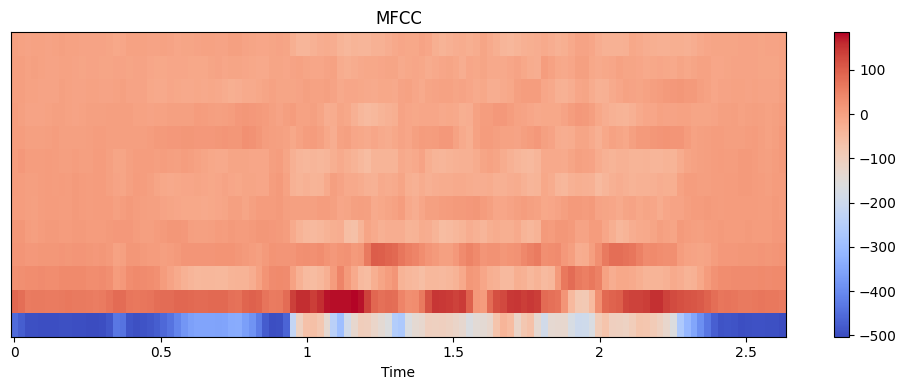

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(feats['mfcc'], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio

# Путь к аудиофайлу
audio_path = '/kaggle/input/asvpoof-2019-dataset/LA/LA/ASVspoof2019_LA_train/flac/LA_T_9552332.flac'

# Воспроизведение аудиофайла
Audio(filename=audio_path)

 # Описание метрик EER, t-DCF.


В соревнованиях по распознаванию речии и противодействию атакам  ASVspoof, обычно используются обе метрики — EER и t-DCF — для оценки производительности системы.НОооо они служат для разных целей и могут использоваться в различнх этапах анализа и оценки.

## EER (Equal Error Rate)

EER (Equal Error Rate) — это метрика, которая используется для оценки производительности системы распознавания или идентификации, такой как система распознавания голоса или биометрическая система. EER определяется как точка, в которой две ошибки (ошибка типа I и ошибка типа II) равны.

Ошибка типа 1 (False Accept Rate, FAR): Вероятность того, что система ошибчно принимает неправильный образец (ложное срабатывание).

Ошибка типа 2 (False Reject Rate, FRR): Вероятность того, что система ошибочно отклоняет правильный образец (ложное отклонение).

EER находится в точке, где FAR и FRR равны. Чем ниже EER, тем лучше производительность системы.

### Формулы для EER

1. **False Accept Rate (FAR)**:
   $$
   \text{FAR} = \frac{\text{Number of False Accepts}}{\text{Number of Non-Target Trials}}
   $$

2. **False Reject Rate (FRR)**:
   $$
   \text{FRR} = \frac{\text{Number of False Rejects}}{\text{Number of Target Trials}}
   $$

EER определяется как точка, в которой FAR и FRR равны:
$$
\text{EER} = \text{FAR} = \text{FRR}
$$

Цель: EER используется для оценки базовой производительности системы распознавания речи или идентификации. Она помогает понять, насколько хорошо система справляется с задачей распознавания или идентификации в идеальных условиях.

Использование: EER может быть использована для сравнения различных систем или конфигураций системы между собой, чтобы определить, какая из них лучше справляется с задачей в идеальных условиях.

Диапазон значений: EER выражается в процентах и может варьироваться от 0% до 100%.

Интерпретация: Чем ниже значение EER, тем лучше производительность системы. Идеальная система имеет EER равный 0%, что означает, что система не делает ошибок ни в одном из типов (False Accept и False Reject). На практике, EER ниже 10% считается хорошим результатом, а ниже 5% — очень хорошим.

## Реализация метрики EER

In [ ]:
#функция вычисляет различные показатели ошибок для системы ASV
def obtain_asv_error_rates(tar_asv, non_asv, spoof_asv, asv_threshold):
    # Вычисляем вероятность ложной тревоги (False Alarm Rate, Pfa_asv) для ASV
    Pfa_asv = sum(non_asv >= asv_threshold) / non_asv.size

    # Вычисляем вероятность пропуска цели (Miss Rate, Pmiss_asv) для ASV
    Pmiss_asv = sum(tar_asv < asv_threshold) / tar_asv.size

    # Вычисляем вероятность пропуска подделки (Miss Rate for Spoofs, Pmiss_spoof_asv) для ASV
    if spoof_asv.size == 0:
        Pmiss_spoof_asv = None
    else:
        Pmiss_spoof_asv = np.sum(spoof_asv < asv_threshold) / spoof_asv.size

    return Pfa_asv, Pmiss_asv, Pmiss_spoof_asv

In [ ]:
#Эта функция вычисляет кривую ошибок (Detection Error Tradeoff, DET curve) для заданных оценок целевых и нецелевых говорящих
def compute_det_curve(target_scores, nontarget_scores):
    # Общее количество оценок
    n_scores = target_scores.size + nontarget_scores.size

    # Объединяем оценки целевых и нецелевых говорящих
    all_scores = np.concatenate((target_scores, nontarget_scores))

    # Создаем метки для целевых и нецелевых говорящих
    labels = np.concatenate((np.ones(target_scores.size), np.zeros(nontarget_scores.size)))

    # Сортируем метки на основе оценок
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Вычисляем кумулятивные суммы меток для целевых говорящих
    tar_trial_sums = np.cumsum(labels)

    # Вычисляем кумулятивные суммы для нецелевых говорящих
    nontarget_trial_sums = nontarget_scores.size - (np.arange(1, n_scores + 1) - tar_trial_sums)

    # Вычисляем частоты ложного отклонения (FRR)
    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums / target_scores.size))

    # Вычисляем частоты ложного принятия (FAR)
    far = np.concatenate((np.atleast_1d(1), nontarget_trial_sums / nontarget_scores.size))

    # Пороговые значения — это отсортированные оценки
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), all_scores[indices]))

    return frr, far, thresholds

In [ ]:
def compute_eer(target_scores, nontarget_scores):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    # Вычисляем кривую ошибок (DET curve)
    frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)

    # Находим минимальную абсолютную разницу между FRR и FAR
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs)

    # Вычисляем Equal Error Rate (EER)
    eer = np.mean((frr[min_index], far[min_index]))

    # Возвращаем EER и соответствующий порог
    return eer, thresholds[min_index]

## t-DCF (Tandem Detection Cost Function)

t-DCF (Tandem Detection Cost Function) — это метрика, которая используется для оценки производительности системы обнаружения в контексте противодействия атакам на системы распознавания речи (ASV). t-DCF учитывает не только ошибки типа I и типа II, но и стоимость этих ошибок в реальном приложении.

DCF (Detection Cost Function): Базовая метрика, которая учитывает стоимость ошибок FAR и FRR.

t-DCF: Расширенная версия DCF, которая учитывает дополнительные факторы, такие как вероятность атаки и стоимость ошибок в контексте конкретного приложения.

t-DCF вычисляется как взвешенная сумма FAR и FRR, где веса определяются стоимостью ошибок и вероятностью атаки. Чем ниже значение t-DCF, тем лучше производительность системы.

1. **False Accept Rate (FAR)**:
   $$
   \text{FAR} = \frac{\text{Number of False Accepts}}{\text{Number of Non-Target Trials}}
   $$

2. **False Reject Rate (FRR)**:
   $$
   \text{FRR} = \frac{\text{Number of False Rejects}}{\text{Number of Target Trials}}
   $$

3. **Costs**:
   - $C_{\text{FA}}$: Cost of a False Accept.
   - $C_{\text{FR}}$: Cost of a False Reject.

4. **Prior probabilities**:
   - $P_{\text{Target}}$: Prior probability of a target trial.
   - $P_{\text{Non-Target}}$: Prior probability of a non-target trial.

Формула для вычисления t-DCF:
$$
\text{t-DCF} = C_{\text{FA}} \cdot P_{\text{Non-Target}} \cdot \text{FAR} + C_{\text{FR}} \cdot P_{\text{Target}} \cdot \text{FRR}
$$

Нормализованная t-DCF:
$$
\text{Normalized t-DCF} = \frac{\text{t-DCF} - \text{min t-DCF}}{\text{max t-DCF} - \text{min t-DCF}}
$$

Использование: t-DCF является более комплексной метрикой, которая помогает оценить, насколько хорошо система справляется с атаками и какова стоимость ошибок в реальном мире. Она используется для финальной оценки системы в контексте соревнования, где важно не только распознать речь, но и защитить систему от атак.

Диапазон значений: t-DCF выражается в виде числа, которое может варьироваться от 0 до бесконечности. Однако, в контексте соревнований обычно используется нормали

## Реализация метрики t-DCF

In [ ]:
def compute_tDCF(bonafide_score_cm, spoof_score_cm, Pfa_asv, Pmiss_asv, Pmiss_spoof_asv, cost_model, print_cost):
    """
    Compute Tandem Detection Cost Function (t-DCF) for a fixed ASV system.
    """
    # Проверка параметров стоимости на здравый смысл
    if cost_model['Cfa_asv'] < 0 or cost_model['Cmiss_asv'] < 0 or \
            cost_model['Cfa_cm'] < 0 or cost_model['Cmiss_cm'] < 0:
        print('WARNING: Usually the cost values should be positive!')

    if cost_model['Ptar'] < 0 or cost_model['Pnon'] < 0 or cost_model['Pspoof'] < 0 or \
            np.abs(cost_model['Ptar'] + cost_model['Pnon'] + cost_model['Pspoof'] - 1) > 1e-10:
        sys.exit('ERROR: Your prior probabilities should be positive and sum up to one.')

    # Проверка наличия данных о подделках для ASV
    if Pmiss_spoof_asv is None:
        sys.exit('ERROR: you should provide miss rate of spoof tests against your ASV system.')

    # Проверка оценок на наличие NaN или Inf
    combined_scores = np.concatenate((bonafide_score_cm, spoof_score_cm))
    if np.isnan(combined_scores).any() or np.isinf(combined_scores).any():
        sys.exit('ERROR: Your scores contain nan or inf.')

    # Проверка, что оценки являются мягкими, а не бинарными решениями
    n_uniq = np.unique(combined_scores).size
    if n_uniq < 3:
        sys.exit('ERROR: You should provide soft CM scores - not binary decisions')

    # Вычисление кривой DET для CM
    Pmiss_cm, Pfa_cm, CM_thresholds = compute_det_curve(bonafide_score_cm, spoof_score_cm)

    # Вычисление констант C1 и C2 для нормализации t-DCF
    C1 = cost_model['Ptar'] * (cost_model['Cmiss_cm'] - cost_model['Cmiss_asv'] * Pmiss_asv) - \
         cost_model['Pnon'] * cost_model['Cfa_asv'] * Pfa_asv
    C2 = cost_model['Cfa_cm'] * cost_model['Pspoof'] * (1 - Pmiss_spoof_asv)

    # Проверка, что веса C1 и C2 неотрицательны
    if C1 < 0 or C2 < 0:
        sys.exit('You should never see this error but I cannot evalute tDCF with negative weights - please check whether your ASV error rates are correctly computed?')

    # Вычисление t-DCF для всех порогов
    tDCF = C1 * Pmiss_cm + C2 * Pfa_cm

    # Нормализация t-DCF
    tDCF_norm = tDCF / np.minimum(C1, C2)

    # Печать параметров стоимости и функции t-DCF, если требуется
    if print_cost:
        print('t-DCF evaluation from [Nbona={}, Nspoof={}] trials\n'.format(bonafide_score_cm.size, spoof_score_cm.size))
        print('t-DCF MODEL')
        print('   Ptar         = {:8.5f} (Prior probability of target user)'.format(cost_model['Ptar']))
        print('   Pnon         = {:8.5f} (Prior probability of nontarget user)'.format(cost_model['Pnon']))
        print('   Pspoof       = {:8.5f} (Prior probability of spoofing attack)'.format(cost_model['Pspoof']))
        print('   Cfa_asv      = {:8.5f} (Cost of ASV falsely accepting a nontarget)'.format(cost_model['Cfa_asv']))
        print('   Cmiss_asv    = {:8.5f} (Cost of ASV falsely rejecting target speaker)'.format(cost_model['Cmiss_asv']))
        print('   Cfa_cm       = {:8.5f} (Cost of CM falsely passing a spoof to ASV system)'.format(cost_model['Cfa_cm']))
        print('   Cmiss_cm     = {:8.5f} (Cost of CM falsely blocking target utterance which never reaches ASV)'.format(cost_model['Cmiss_cm']))
        print('\n   Implied normalized t-DCF function (depends on t-DCF parameters and ASV errors), s=CM threshold)')

        if C2 == np.minimum(C1, C2):
            print('   tDCF_norm(s) = {:8.5f} x Pmiss_cm(s) + Pfa_cm(s)\n'.format(C1 / C2))
        else:
            print('   tDCF_norm(s) = Pmiss_cm(s) + {:8.5f} x Pfa_cm(s)\n'.format(C2 / C1))

    return tDCF_norm, CM_thresholds

Пример Результатов t-DCF и EER для двух базовых контрмер и сценариев логического и физического доступа(LFCC-GMM и CQCC-GMM — это методы анализа и классификации аудиосигналов)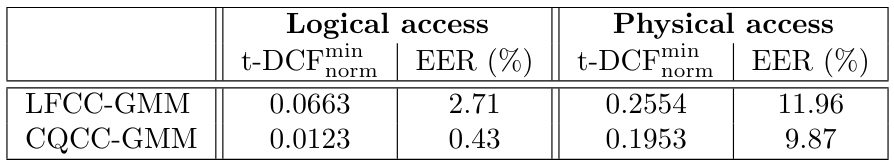

 # эксперименты с несколькими бустингами, с разными моделями из пакета sklearn

In [ ]:
бебе мне сложно ((((((((((((((((((((